# Introduction

The SenNet Data Sharing Portal (https://data.sennetconsortium.org/) is a central platform developed by the NIH-funded Cellular Senescence Network (SenNet, https://sennetconsortium.org/) to support collaborative research on cellular senescence. It enables researchers to share and access a wide array of high-resolution datasets, including single-cell RNA sequencing, spatial transcriptomics, proteomics, and imaging data. A major objective of the portal is to facilitate the creation of maps that illustrate the spatial and temporal distribution of senescent cells across different tissues and physiological conditions.

The portal offers interactive data access as well as tools and APIs for programmatic data access, allowing users to efficiently search, retrieve, and analyze data. It also provides detailed documentation and submission guidelines for data contributors. Upon curation and processing the data is continuously made available to the public through the portal, promoting transparency and broader scientific collaboration.

## Description

The image illustrates a typical workflow within the SenNet Data Sharing Portal, showcasing how a user can filter and export dataset information. The process begins with the user narrowing down the displayed entities by selecting only the "Datasets" category. Once filtered, a list of available datasets appears. The user then refines the selection further by choosing the "Transcriptomics" assay type, which updates the view to show only relevant datasets.

From the filtered list, the user selects two datasets—one representing bulk RNA sequencing and the other single-cell RNA sequencing. To export this selection, the user clicks on the three-dot menu (located at the top of the dataset list) and chooses the "Export Selected to TSV" option. This action generates a .tsv file containing the IDs of the selected datasets, which is then automatically downloaded to the user's computer.

Key steps shown in the image:
+ Filtering entities to display only datasets.
+ Selecting the "Transcriptomics" assay type.
+ Choosing two datasets (bulk RNA and single-cell RNA).
+ Using the three-dot menu to export selected dataset IDs.
+ Downloading the resulting TSV file to the local machine.

Each SenNet dataset is associated with **`sennet_id`** and **`uuid`**. The example below shows dataset `SNT324.VZGF.293`, where its associated uuid is downloaded to TSV file.

The datasets can be either **raw** or **derived**. Files of raw datasets are only available through globus, while th files of derived datasets can be accessed via globus or direclty on the portal.

In addition to basic filtering, the SenNet Data Sharing Portal (https://data.sennetconsortium.org/) offers powerful metadata-driven search capabilities that allow users to perform highly specific and complex queries. Users can filter datasets not only by assay type or category but also by a wide range of metadata fields. These include collection dates, contributing institutions or researchers, assay-specific parameters, sample preparation methods, tissue types, and much more. This level of granularity enables researchers to precisely locate datasets that match their experimental needs or analytical criteria, making the portal a robust tool for targeted data discovery and comparative analysis.

Each dataset listed in the SenNet Data Sharing Portal can be clicked on to open a detailed view, where users can explore the dataset’s contents, examine associated metadata, and review linked samples. This detailed view provides comprehensive information, including experimental protocols, assay parameters, contributor details, and sample characteristics. For datasets derived from human tissue, the portal also integrates with the HuBMAP Common Coordinate Framework (CCF)-based visualization tool, allowing users to view each sample in a 3D anatomical context. Through this integration, samples are mapped onto a human avatar, enabling spatial exploration of tissue origin and enhancing biological interpretation through anatomical localization.

<details open>
  <summary><span style="color:red;">Click to expand/collapse image</span></summary>

  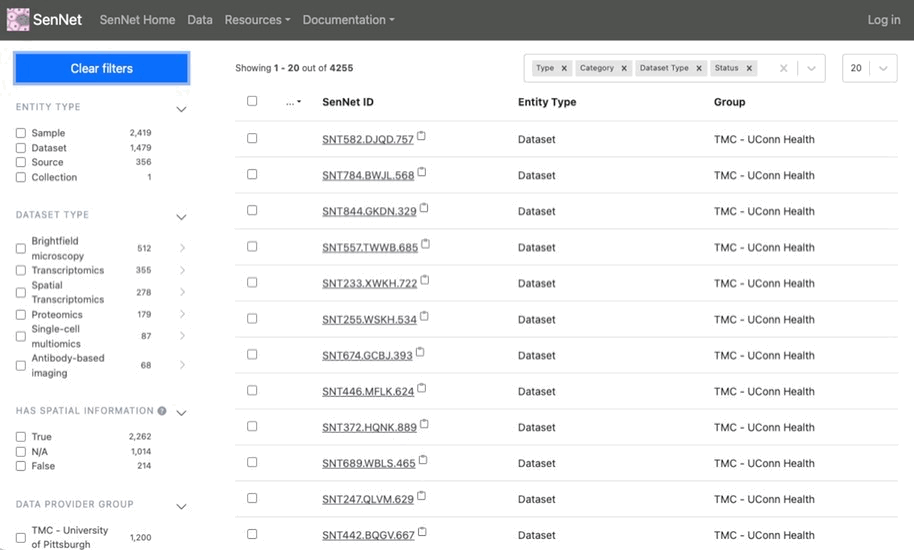
  
</details>

## Exploring the data programmatically

The downloaded TSV file is loaded with a python library `pandas`. The basic metadata can be viewed in the loaded data table. SenNet serves several Application Programming Interfaces (API), allowing the users to find files associated with datasets and any other relevant entities. The two python functions below allow the user to find the derived datasets files for download or viewing.

The basic workflow is to identify any derived datasets for the **SenNet ID** of interest, and then identify any files (assets) assocoated with the derived dataset.

In [ ]:
import pandas as pd

wdir = '/projects/activities/kappsen-tmc/USERS/domans/examples-sennet-portal'
df = pd.read_csv(f'{wdir}/d8a3ab258c70e5d3d2ad7dfd67c6d2d4 - 5e2a3fb4c3c2ffcc9d380f4b1dc72300.tsv', delimiter='\t', index_col='SenNet ID')
df.style.set_properties(**{'text-align': 'left'})

In [ ]:
import requests

def get_descendant_uuid(uuid, index=0):
    url = f"https://entity.api.sennetconsortium.org/descendants/{uuid}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if len(data)==0:
            print('No derived data found...')
            rp = None
        elif len(data)>=1:
            if len(data)>1:
                print('More than one derived dataset present')
            try:
                dd = data[index]['uuid']
            except:
                print('Failed to find descendant...')
                dd = None
    else:
        print(f"Failed to retrieve data: {response.status_code}")
    return dd

def get_processed_files_of_uuid(uuid):
    url = f"https://entity.api.sennetconsortium.org/entities/{uuid}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        try:
            rp = [f"https://assets.api.sennetconsortium.org/{uuid}/{f['rel_path']}" for f in  data['files']]
        except:
            print('Failed to extract file path...')
            rp = None
    else:
        rp = None
        print(f"Failed to retrieve data: {response.status_code}")
    return rp

### Example 1: `SNT324.VZGF.293`

In [ ]:
sennet_id = 'SNT324.VZGF.293'

# Retrieve the UUID for the specified SenNet ID
uuid = df.loc[sennet_id, 'UUID']
print(f"SenNet ID: \t{sennet_id}")
print(f"UUID: \t\t{uuid}")

# Get the derived UUID, take the first one
derived_uuid = get_descendant_uuid(uuid, index=0)

# If a derived UUID is found, get the processed files URLs
if derived_uuid is not None:
    derived_dataset_files = get_processed_files_of_uuid(derived_uuid)

# Display the first 5 processed file URLs
derived_dataset_files[:5]

In [ ]:
# Use the file link to download the dataset or click to view it in a browser
!wget https://assets.api.sennetconsortium.org/928992bb468132426346c567be4d7c40/expr.h5ad

### Example 2: `SNT888.NZKL.838`

In [ ]:
sennet_id = 'SNT888.NZKL.838'

# Retrieve the UUID for the specified SenNet ID
uuid = df.loc[sennet_id, 'UUID']
print(f"SenNet ID: \t{sennet_id}")
print(f"UUID: \t\t{uuid}")

# Get the derived UUID, take the first one
derived_uuid = get_descendant_uuid(uuid, index=0)

# If a derived UUID is found, get the processed files URLs
if derived_uuid is not None:
    derived_dataset_files = get_processed_files_of_uuid(derived_uuid)

# Display the first 5 processed file URLs
derived_dataset_files[:5]

## Accessing raw dataset files

The raw files can be found and downloaded [Globus](https://www.globus.org/) Command Line Interface ([CLI](https://docs.globus.org/cli/)).<br>
The example below shows how to list the data structure of **`uuid`**, where **`SENNET_PUBLIC_ENDPOINT`** is the public endpoint.


```bash
SENNET_PUBLIC_ENDPOINT="96b2b9e5-6915-4dbc-9ab5-173ad628902e"
uuid="d8a3ab258c70e5d3d2ad7dfd67c6d2d4"

$ globus ls $SENNET_PUBLIC_ENDPOINT:$uuid
    extras/
    raw/
    d8a3ab258c70e5d3d2ad7dfd67c6d2d4-metadata.tsv
    metadata.json

$ globus ls $SENNET_PUBLIC_ENDPOINT:$uuid/raw/fastq/RNA/
    SNM0063-RL-B0001-S1_S1_L001_R1_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L001_R2_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L002_R1_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L002_R2_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L003_R1_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L003_R2_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L004_R1_001.fastq.gz
    SNM0063-RL-B0001-S1_S1_L004_R2_001.fastq.gz
```

Furthermore, the user can set up a batch transfer with the Globus CLI, or transfer single items: [https://docs.globus.org/cli/examples/](https://docs.globus.org/cli/examples/)